In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import IPython.display as idis
import seaborn as sns
import copy
import scipy.stats as stat
%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 300

In [2]:
#load data

Mimic_data = '/home/student/huy/mnt/mrAnKhuongData/storage/data/curated/all_hourly_data.h5'
vitals_data = pd.read_hdf(Mimic_data, 'vitals_labs')
interventions = pd.read_hdf(Mimic_data, 'interventions')
patients = pd.read_hdf(Mimic_data, 'patients')


In [5]:
#get shape of data

print(vitals_data.shape)
print(interventions.shape)
print(patients.shape)

(3768901, 312)
(3768901, 14)
(38604, 17)


# Static variable exploration

In [4]:
list(patients.columns)

['gender',
 'ethnicity',
 'age',
 'insurance',
 'admittime',
 'dischtime',
 'deathtime',
 'intime',
 'outtime',
 'los_icu',
 'admission_type',
 'first_careunit',
 'mort_icu',
 'mort_hosp',
 'hospital_expire_flag',
 'hospstay_seq',
 'max_hours']

In [6]:
interventions.head(20)

vent  vaso  adenosine  dobutamine  \
subject_id hadm_id icustay_id hours_in                                      
3          145834  211552     0            1     0          0           0   
                              1            1     1          0           0   
                              2            1     1          0           0   
                              3            1     1          0           0   
                              4            1     1          0           0   
                              5            1     1          0           0   
                              6            1     1          0           0   
                              7            1     1          0           0   
                              8            1     1          0           0   
                              9            1     1          0           0   
                              10           1     1          0           0   
                              11           1     1          0           0   
                              12           1     1          0           0   
                              13           1     1          0           0   
                              14           1     1          0           0   
                              15           1     1          0           0   
                              16           1     1          0           0   
                              17           1     1          0           0   
                              18           1     1          0           0   
                              19           1     1          0           0   

                                        dopamine  epinephrine  isuprel  \
subject_id hadm_id icustay_id hours_in                                   
3          145834  211552     0                0            0        0   
                              1                1            0        0   
                              2                1            0        0   
                              3                0            0        0   
                              4                0            0        0   
                              5                0            0        0   
                              6                0            0        0   
                              7                0            0        0   
                              8                0            0        0   
                              9                0            0        0   
                              10               0            0        0   
                              11               0            0        0   
                              12               0            0        0   
                              13               0            0        0   
                              14               0            0        0   
                              15               0            0        0   
                              16               0            0        0   
                              17               0            0        0   
                              18               0            0        0   
                              19               0            0        0   

                                        milrinone  norepinephrine  \
subject_id hadm_id icustay_id hours_in                              
3          145834  211552     0                 0               0   
                              1                 0               0   
                              2                 0               0   
                              3                 0               0   
                              4                 0               1   
                              5                 0               1   
                              6                 0               1   
                              7                 0               1   
                          

In [6]:
x= round((patients['admittime'] - patients['intime']).dt.total_seconds()/(24*60*60),4)

# abnormal behavior : admit time to hospial > first intime ICU
y=sum(list(x>0))
print("number of abnormal patient: ",y)

sorted(list(x),reverse=True)

number of abnormal patient:  415


[1.0269,
 0.9993,
 0.9379,
 0.9317,
 0.9183,
 0.8854,
 0.8825,
 0.8622,
 0.8385,
 0.8351,
 0.77,
 0.7688,
 0.7584,
 0.7249,
 0.7224,
 0.6921,
 0.6896,
 0.6675,
 0.659,
 0.624,
 0.6105,
 0.6025,
 0.5919,
 0.5832,
 0.5735,
 0.5304,
 0.5066,
 0.4977,
 0.4868,
 0.4673,
 0.4661,
 0.4479,
 0.4159,
 0.4098,
 0.4083,
 0.3769,
 0.3758,
 0.3717,
 0.3097,
 0.3056,
 0.2981,
 0.2882,
 0.2825,
 0.2799,
 0.2667,
 0.2646,
 0.2646,
 0.2528,
 0.234,
 0.2189,
 0.2144,
 0.2125,
 0.2092,
 0.2086,
 0.2075,
 0.2046,
 0.1933,
 0.1916,
 0.1849,
 0.1806,
 0.1781,
 0.1779,
 0.1777,
 0.1776,
 0.1758,
 0.1756,
 0.1755,
 0.1746,
 0.1732,
 0.1723,
 0.1685,
 0.1621,
 0.1613,
 0.1585,
 0.1566,
 0.1549,
 0.1537,
 0.1508,
 0.1504,
 0.1502,
 0.1481,
 0.1451,
 0.1431,
 0.1424,
 0.1421,
 0.1403,
 0.1384,
 0.137,
 0.1365,
 0.1363,
 0.1351,
 0.1333,
 0.1319,
 0.1314,
 0.1308,
 0.1293,
 0.1274,
 0.1245,
 0.1241,
 0.1236,
 0.1235,
 0.1234,
 0.1234,
 0.1233,
 0.1233,
 0.1229,
 0.1215,
 0.1211,
 0.1208,
 0.1195,
 0.1179,
 0.1166

In [7]:

se = pd.Series(list(map(lambda x: round(x.total_seconds()/(24*60*60),4),(patients.iloc[:,patients.columns.get_loc('dischtime')] - patients.iloc[:,patients.columns.get_loc('admittime')]))))
patients['total_los'] = se.values

In [8]:
# gender explore
male_count = len(list(filter(lambda x: x=='F', patients['gender'])))
male_rate = male_count / len(patients['gender'])
print(male_rate)

0.4339705729976168


In [9]:
# ethenic explore
print('Unique ethenicity:\n ')
for i in iter(patients['ethnicity'].unique()):
    print(i)
    
print('------------------ \n')
# white_patient = len(list(filter(lambda x: 'WHITE' in x, patients['ethnicity'])))
# print('white patient: ', white_patient)

white_alaska_count=0
black_count=0
hispanic_PORTUGUESE_southEmerican_caribbean_count=0
asian_count=0
unknown_ethenic_count=0
multi_race_count=0
middle_eastern_count=0
for item in patients['ethnicity']:
    if 'WHITE' in item or 'ALASKA' in item:
        white_alaska_count = white_alaska_count + 1
    elif 'HISPANIC' in item or 'PORTUGUESE' in item or 'CARIBBEAN' in item or 'AMERICAN' in item:
        hispanic_PORTUGUESE_southEmerican_caribbean_count = hispanic_PORTUGUESE_southEmerican_caribbean_count + 1
    elif 'BLACK'in item:
        black_count = black_count + 1
    elif 'ASIAN' in item:
        asian_count = asian_count + 1
    elif 'MULTI RACE' in item:
        multi_race_count = multi_race_count + 1
    elif 'MIDDLE EASTERN' in item:
        middle_eastern_count = middle_eastern_count + 1
    elif 'UNKNOWN'in item or 'UNABLE'in item or 'OTHER' in item or 'DECLINED' in item:
        unknown_ethenic_count =  unknown_ethenic_count + 1
        
print('white related patients count: ', white_alaska_count)
print('black related patients count: ', black_count)
print('hispanic related patients count: ', hispanic_PORTUGUESE_southEmerican_caribbean_count)
print('asian related patients count: ', asian_count)
print('unknown ethenic patients count: ', unknown_ethenic_count)
print('Multi race count: ', multi_race_count)
print('middle eastern patients count: ', middle_eastern_count)


Unique ethenicity:
 
WHITE
UNKNOWN/NOT SPECIFIED
PATIENT DECLINED TO ANSWER
BLACK/AFRICAN AMERICAN
ASIAN
HISPANIC OR LATINO
HISPANIC/LATINO - GUATEMALAN
OTHER
HISPANIC/LATINO - PUERTO RICAN
ASIAN - ASIAN INDIAN
ASIAN - VIETNAMESE
MULTI RACE ETHNICITY
HISPANIC/LATINO - DOMINICAN
AMERICAN INDIAN/ALASKA NATIVE
WHITE - RUSSIAN
HISPANIC/LATINO - SALVADORAN
UNABLE TO OBTAIN
BLACK/CAPE VERDEAN
WHITE - OTHER EUROPEAN
ASIAN - CHINESE
ASIAN - CAMBODIAN
ASIAN - FILIPINO
PORTUGUESE
CARIBBEAN ISLAND
SOUTH AMERICAN
WHITE - EASTERN EUROPEAN
HISPANIC/LATINO - COLOMBIAN
BLACK/HAITIAN
WHITE - BRAZILIAN
HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)
ASIAN - THAI
HISPANIC/LATINO - HONDURAN
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER
MIDDLE EASTERN
BLACK/AFRICAN
ASIAN - OTHER
HISPANIC/LATINO - CUBAN
HISPANIC/LATINO - MEXICAN
ASIAN - KOREAN
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE
ASIAN - JAPANESE
------------------ 

white related patients count:  27529
black related patients count:  230
hispanic

In [10]:
# abnormal behavior: many hospital LOS <ICU LOS
gap_los_icu_hospital = list(patients['total_los'] - patients['los_icu'])

sorted(gap_los_icu_hospital)
print("Number patients with total hospital LOS < icu los: ", sum(np.array(gap_los_icu_hospital)<0))

Number patients with total hospital LOS < icu los:  3930


In [11]:
# explore TOTAL LOS

low_los_total = list(filter(lambda x: x<=0, patients['total_los']))
low_los_total.sort(reverse=True)
# print(low_los_total)
# len(high_los_total)

#detect negative total los( STRANGE!)
negative_total_los_filter = patients['total_los'] < 0
negative_total_los_patients = patients[negative_total_los_filter]
print("Number of negative total los patient: ", sum(negative_total_los_filter))


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(negative_total_los_patients)

#drop all patients with total LOS <0
# patients.drop(negative_total_los_patients.index, inplace=True)

Number of negative total los patient:  67


,,,gender,ethnicity,age,insurance,admittime,dischtime,deathtime,intime,outtime,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,max_hours,total_los
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,
181,102631,246694,M,WHITE,65.2182,Private,2153-10-12 09:49:00,2153-10-12 06:29:00,2153-10-12 06:29:00,2153-10-12 09:52:00,2153-10-13 06:29:00,0.8590,EMERGENCY,CSRU,0,0,1,1,20,-0.1389
516,187482,213831,F,UNKNOWN/NOT SPECIFIED,70.9854,Medicare,2197-07-31 20:18:00,2197-07-31 01:10:00,2197-07-31 01:10:00,2197-07-31 20:19:11,2197-08-01 01:10:05,0.2020,EMERGENCY,MICU,0,0,1,1,4,-0.7972
1381,181430,291798,F,WHITE,81.4737,Medicare,2189-01-02 14:25:00,2189-01-02 12:00:00,2189-01-02 12:00:00,2189-01-02 14:28:39,2189-01-03 01:37:51,0.4647,EMERGENCY,SICU,0,0,1,1,11,-0.1007
2420,135098,227111,F,WHITE,48.5372,Medicaid,2184-12-01 19:28:00,2184-12-01 16:50:00,NaT,2184-12-01 01:00:54,2184-12-01 17:12:36,0.6748,EMERGENCY,MICU,0,0,0,1,16,-0.1097
2677,108011,209967,F,WHITE,300.0025,Medicare,2128-04-16 12:28:00,2128-04-16 12:00:00,2128-04-16 12:00:00,2128-04-16 22:16:50,2128-04-17 00:20:02,0.0856,EMERGENCY,TSICU,0,0,1,1,2,-0.0194
2858,190088,293048,F,WHITE,82.5388,Medicare,2108-09-25 15:29:00,2108-09-25 12:00:00,2108-09-25 12:00:00,2108-09-25 15:30:25,2108-09-26 02:05:37,0.4411,EMERGENCY,CCU,0,0,1,1,10,-0.1451
3229,161198,254078,F,WHITE,74.8484,Medicare,2134-11-30 18:19:00,2134-11-30 12:00:00,2134-11-30 12:00:00,2134-11-30 18:20:33,2134-12-01 03:13:08,0.3698,EMERGENCY,TSICU,0,0,1,1,8,-0.2632
3915,198555,240959,M,BLACK/AFRICAN AMERICAN,68.1211,Medicare,2178-04-07 16:31:00,2178-04-07 12:00:00,2178-04-07 12:00:00,2178-04-07 16:32:52,2178-04-08 01:43:17,0.3822,EMERGENCY,MICU,0,0,1,1,9,-0.1882
5452,133470,205244,M,WHITE,88.4306,Private,2142-02-20 13:40:00,2142-02-20 12:00:00,2142-02-20 12:00:00,2142-02-20 13:42:03,2142-02-21 00:28:58,0.4492,EMERGENCY,CCU,0,0,1,1,10,-0.0694


Text(0, 0.5, 'count')

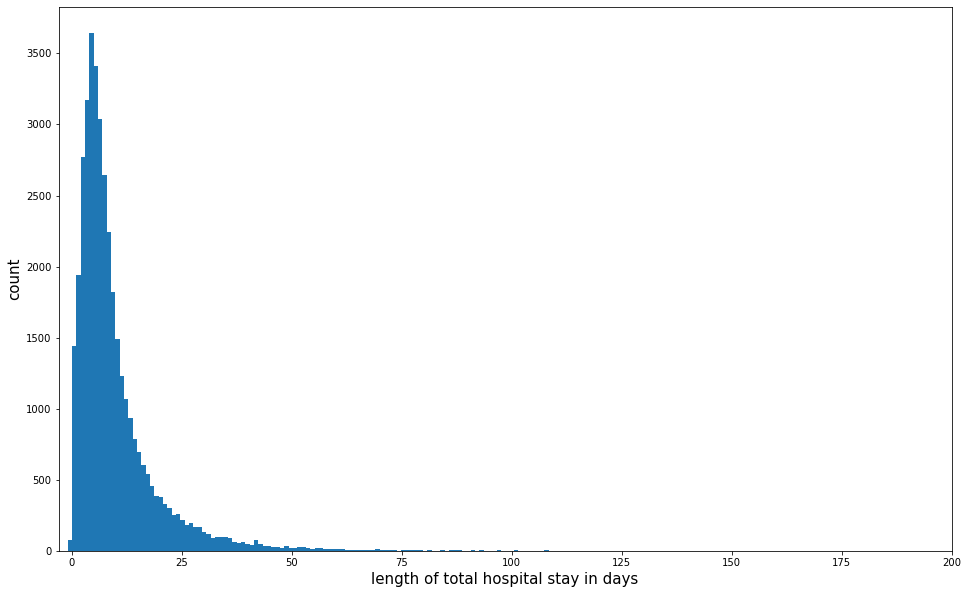

In [12]:
# plot total los distribution

total_los = patients['total_los']

plt.figure(figsize=(16,10))
plt.hist(total_los, bins=300)
plt.xlim((-3,200))
plt.xlabel('length of total hospital stay in days', fontsize=15)
plt.ylabel('count', fontsize=15)

In [13]:
# check high ICU LOS
high_los_icu = list(filter(lambda x: x>30, patients['los_icu']))
high_los_icu.sort(reverse=True)
len(high_los_icu)

402

Text(0, 0.5, 'count')

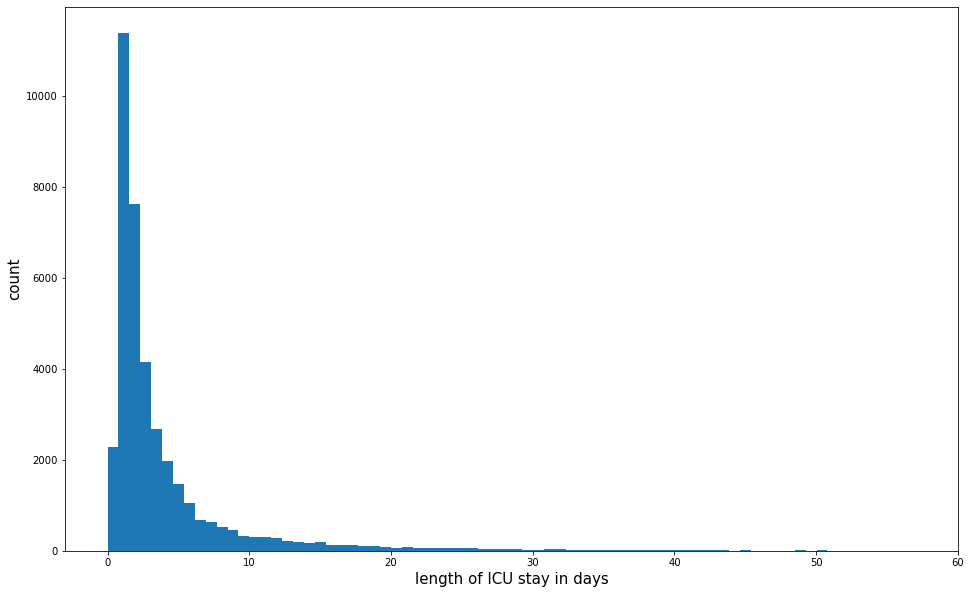

In [14]:
# plot ICU LOS distribution
los_icu = copy.deepcopy(patients['los_icu'])
# display(id(los_icu))
# display(id(patients['los_icu']))
plt.figure(figsize=(16, 10))
plt.hist(los_icu, bins=200)
plt.xlim((-3,60))
plt.xlabel('length of ICU stay in days', fontsize=15)
plt.ylabel('count', fontsize=15)

In [15]:
#convert patients >=300 to 95
patients['age'] = patients['age'].map(lambda x:  95 if (x >= 300) else x)
#number patients age =95
len(list(filter(lambda x: x==95, patients['age'])))

1990

Text(0, 0.5, 'Age')

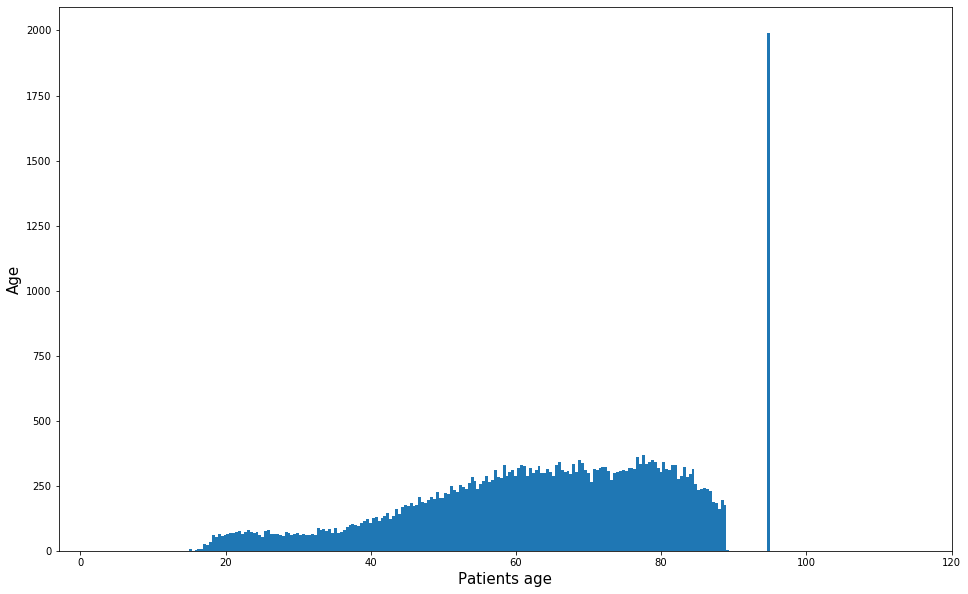

In [16]:
# Plot age distribution
age_patients_list = list(copy.deepcopy(patients['age'])) #deepcopy since pandas dataframe is mutable object
# display(age_patients_list)
# display(id(age_patients_list))
# display(id(patients['age']))
plt.figure(figsize=(16,10))
plt.hist(age_patients_list, bins=200)
plt.xlim((-3,120))
plt.xlabel('Patients age', fontsize=15)
plt.ylabel('Age', fontsize=15)

'Correlation between age and total los: '

-0.01718205083174809

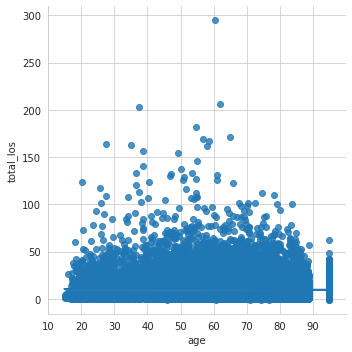

In [17]:
#correlation of age and total los
correlation, p_value = stat.pearsonr(patients['age'],patients['total_los'])
display('Correlation between age and total los: ', correlation)
sns.set_style('whitegrid')
sns.lmplot(x='age', y='total_los', data=patients)

In [18]:
# Explore type insurance
print('All type of patients insurance\': ',patients['insurance'].unique())

medicare=0
los_medicare=0
private=0
los_private=0
medicaid=0
los_medicaid=0
government=0
los_government=0
self_pay=0
los_self_pay=0

for index in range(0,patients.shape[0]):
    if patients.iloc[index, patients.columns.get_loc('insurance')]=='Medicare':
        medicare = medicare + 1
        los_medicare = los_medicare + patients.iloc[index, patients.columns.get_loc('total_los')]
    elif patients.iloc[index, patients.columns.get_loc('insurance')]=='Medicaid':
        medicaid = medicaid + 1
        los_medicaid = los_medicaid + patients.iloc[index, patients.columns.get_loc('total_los')] 
    elif patients.iloc[index, patients.columns.get_loc('insurance')]=='Private':
        private = private + 1
        los_private = los_private + patients.iloc[index, patients.columns.get_loc('total_los')]
    elif patients.iloc[index, patients.columns.get_loc('insurance')]=='Government':
        government = government + 1
        los_government = los_government + patients.iloc[index, patients.columns.get_loc('total_los')]
    else:
        self_pay = self_pay + 1
        los_self_pay = los_self_pay + patients.iloc[index, patients.columns.get_loc('total_los')]
        
print('Medicare, mean_los: ', medicare, round(los_medicare/medicare,4))
print('Private, mean_los', private, round(los_private/private, 4))
print('Medicaid mean_los,  ', medicaid, round(los_medicaid/medicaid, 4))
print('Government, mean_los: ', government, round(los_government/government, 4))
print('Self Pay, mean_los: ', self_pay, round(los_self_pay/self_pay, 4))

All type of patients insurance':  ['Medicare' 'Private' 'Medicaid' 'Government' 'Self Pay']
Medicare, mean_los:  20442 9.8949
Private, mean_los 13282 9.643
Medicaid mean_los,   3173 11.4673
Government, mean_los:  1162 9.5638
Self Pay, mean_los:  545 6.5739


In [109]:
#view type of insurance
patients_government_insurance = patients['insurance'] == 'Self Pay'
patients[patients_government_insurance].head()

,,,gender,ethnicity,age,insurance,admittime,dischtime,deathtime,intime,outtime,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,max_hours,total_los
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,
80,115385,256068,M,WHITE,43.9147,Self Pay,2148-11-11 12:12:00,2148-11-16 11:53:00,NaT,2148-11-11 12:13:00,2148-11-12 16:46:47,1.1901,EMERGENCY,TSICU,0,0,0,1,28,4.9868
250,124271,205951,F,BLACK/AFRICAN AMERICAN,23.8784,Self Pay,2188-11-12 09:22:00,2188-11-22 12:00:00,2188-11-22 12:00:00,2188-11-12 09:25:47,2188-11-23 01:24:45,10.6659,EMERGENCY,MICU,1,1,1,1,255,10.1097
359,144265,250767,M,UNKNOWN/NOT SPECIFIED,48.8693,Self Pay,2176-06-30 03:00:00,2176-07-03 15:12:00,NaT,2176-06-30 06:01:00,2176-07-03 15:12:00,3.3826,EMERGENCY,CSRU,0,0,0,1,81,3.5083
559,179436,271321,M,UNKNOWN/NOT SPECIFIED,39.0655,Self Pay,2131-12-22 08:47:00,2131-12-25 10:49:00,2131-12-25 10:49:00,2131-12-22 08:49:04,2131-12-25 10:49:54,3.0839,EMERGENCY,TSICU,1,1,1,1,74,3.0847
828,180903,295376,M,WHITE,24.1759,Self Pay,2200-10-28 01:07:00,2200-10-28 13:29:00,NaT,2200-10-28 01:07:00,2200-10-28 13:29:00,0.5153,EMERGENCY,MICU,0,0,0,1,12,0.5153


# Vital lab exploration

In [20]:
vitals_data.head()

LEVEL2                                 alanine aminotransferase             \
Aggregation Function                                      count  mean  std   
subject_id hadm_id icustay_id hours_in                                       
3          145834  211552     0                             2.0  25.0  0.0   
                              1                             0.0   NaN  NaN   
                              2                             0.0   NaN  NaN   
                              3                             0.0   NaN  NaN   
                              4                             0.0   NaN  NaN   

LEVEL2                                 albumin           albumin ascites       \
Aggregation Function                     count mean  std           count mean   
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0            2.0  1.8  0.0             0.0  NaN   
                              1            0.0  NaN  NaN             0.0  NaN   
                              2            0.0  NaN  NaN             0.0  NaN   
                              3            0.0  NaN  NaN             0.0  NaN   
                              4            0.0  NaN  NaN             0.0  NaN   

LEVEL2                                     albumin pleural  ...  \
Aggregation Function                   std           count  ...   
subject_id hadm_id icustay_id hours_in                      ...   
3          145834  211552     0        NaN             0.0  ...   
                              1        NaN             0.0  ...   
                              2        NaN             0.0  ...   
                              3        NaN             0.0  ...   
                              4        NaN             0.0  ...   

LEVEL2                                 white blood cell count  \
Aggregation Function                                      std   
subject_id hadm_id icustay_id hours_in                          
3          145834  211552     0                      4.012837   
                              1                           NaN   
                              2                           NaN   
                              3                           NaN   
                              4                           NaN   

LEVEL2                                 white blood cell count urine           \
Aggregation Function                                          count mean std   
subject_id hadm_id icustay_id hours_in                                         
3          145834  211552     0                                 0.0  NaN NaN   
                              1                                 0.0  NaN NaN   
                              2                                 0.0  NaN NaN   
                              3                                 0.0  NaN NaN   
                              4                                 0.0  NaN NaN   

LEVEL2                                    ph                 ph urine           
Aggregation Function                   count  mean       std    count mean std  
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0          9.0  7.40  0.147733      1.0  5.0 NaN  
                              1          0.0   NaN       NaN      0.0  NaN NaN  
                              2          3.0  7.26  0.000000      0.0  NaN NaN  
                              3          0.0   NaN       NaN      0.0  NaN NaN  
                              4          0.0   NaN       NaN      0.0  NaN NaN  

[5 rows x 312 columns]

In [21]:
list(vitals_data.columns.levels[0])

['alanine aminotransferase',
 'albumin',
 'albumin ascites',
 'albumin pleural',
 'albumin urine',
 'alkaline phosphate',
 'anion gap',
 'asparate aminotransferase',
 'basophils',
 'bicarbonate',
 'bilirubin',
 'blood urea nitrogen',
 'calcium',
 'calcium ionized',
 'calcium urine',
 'cardiac index',
 'cardiac output fick',
 'cardiac output thermodilution',
 'central venous pressure',
 'chloride',
 'chloride urine',
 'cholesterol',
 'cholesterol hdl',
 'cholesterol ldl',
 'co2',
 'co2 (etco2, pco2, etc.)',
 'creatinine',
 'creatinine ascites',
 'creatinine body fluid',
 'creatinine pleural',
 'creatinine urine',
 'diastolic blood pressure',
 'eosinophils',
 'fibrinogen',
 'fraction inspired oxygen',
 'fraction inspired oxygen set',
 'glascow coma scale total',
 'glucose',
 'heart rate',
 'height',
 'hematocrit',
 'hemoglobin',
 'lactate',
 'lactate dehydrogenase',
 'lactate dehydrogenase pleural',
 'lactic acid',
 'lymphocytes',
 'lymphocytes ascites',
 'lymphocytes atypical',
 'lympho

In [22]:
# initialize list of lists 
data = [[23,None,11], [None,None ,18], [22, 14,33]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Name', 'Age','huy']) 
  
# print dataframe. 
df 

# check rate NaN
df.apply(lambda x: round(sum(x.isna())/3,2))

Name    0.33
Age     0.67
huy     0.00
dtype: float64

In [24]:
missing_rate_vital = vitals_data.apply(lambda x: round(sum(x.isna())/vitals_data.shape[0],3))

In [25]:
missing_rate_vital

LEVEL2                    Aggregation Function
alanine aminotransferase  count                   0.000
                          mean                    0.981
                          std                     0.990
albumin                   count                   0.000
                          mean                    0.987
                                                  ...  
ph                        mean                    0.897
                          std                     0.931
ph urine                  count                   0.000
                          mean                    0.991
                          std                     1.000
Length: 312, dtype: float64

In [41]:
lvl2 = vitals_data[(vitals_data.index.get_level_values('icustay_id').isin(set(Ys.index.get_level_values('icustay_id')))) & (vitals_data.index.get_level_values('hours_in') < 24)]

In [40]:
Ys = patients[patients.max_hours > 24 + 6][['mort_hosp', 'mort_icu', 'los_icu']]
Ys

,,,mort_hosp,mort_icu,los_icu
subject_id,hadm_id,icustay_id,,,
3,145834,211552,0,0,6.0646
4,185777,294638,0,0,1.6785
6,107064,228232,0,0,3.6729
9,150750,220597,1,1,5.3231
11,194540,229441,0,0,1.5844
...,...,...,...,...,...
99982,151454,221194,0,0,7.9493
99985,176670,279638,0,0,11.2998
99991,151118,226241,0,0,3.1426


In [35]:
set(patients.index.get_level_values('icustay_id'))

{262154,
 262156,
 262169,
 262171,
 262172,
 262174,
 262178,
 262179,
 262181,
 262182,
 262186,
 262187,
 262191,
 262192,
 262194,
 262197,
 262198,
 262199,
 262201,
 262203,
 262204,
 262207,
 262210,
 262215,
 262218,
 262219,
 262223,
 262225,
 262226,
 262227,
 262228,
 262229,
 262231,
 262232,
 262235,
 262236,
 262237,
 262247,
 262248,
 262249,
 262252,
 262255,
 262259,
 262261,
 262264,
 262265,
 262267,
 262272,
 262275,
 262281,
 262282,
 262287,
 262288,
 262290,
 262292,
 262295,
 262296,
 262297,
 262298,
 262301,
 262302,
 262304,
 262306,
 262308,
 262309,
 262310,
 262311,
 262313,
 262316,
 262319,
 262322,
 262324,
 262325,
 262329,
 262330,
 262335,
 262338,
 262339,
 262343,
 262352,
 262357,
 262360,
 262363,
 262364,
 262370,
 262373,
 262374,
 262375,
 262381,
 262385,
 262386,
 262389,
 262391,
 262392,
 262393,
 262397,
 262403,
 262404,
 262406,
 262407,
 262409,
 262411,
 262416,
 262417,
 262422,
 262426,
 262429,
 262433,
 262436,
 262438,
 262441,
 

In [38]:
patients.total_los

subject_id  hadm_id  icustay_id
3           145834   211552        10.7847
4           185777   294638         7.7590
6           107064   228232        16.3646
9           150750   220597         4.8812
11          194540   229441        25.5292
                                    ...   
99985       176670   279638        16.5958
99991       151118   226241        12.1562
99992       197084   242052         2.9951
99995       137810   229633         3.2188
99999       113369   246512         5.3854
Name: total_los, Length: 38604, dtype: float64

In [ ]:
df.index.get_level_values('icustay_id').isin(set(Ys.index.get_level_values('icustay_id')))

In [42]:
lvl2

LEVEL2                                 alanine aminotransferase             \
Aggregation Function                                      count  mean  std   
subject_id hadm_id icustay_id hours_in                                       
3          145834  211552     0                             2.0  25.0  0.0   
                              1                             0.0   NaN  NaN   
                              2                             0.0   NaN  NaN   
                              3                             0.0   NaN  NaN   
                              4                             0.0   NaN  NaN   
...                                                         ...   ...  ...   
99995      137810  229633     19                            0.0   NaN  NaN   
                              20                            0.0   NaN  NaN   
                              21                            0.0   NaN  NaN   
                              22                            0.0   NaN  NaN   
                              23                            0.0   NaN  NaN   

LEVEL2                                 albumin           albumin ascites       \
Aggregation Function                     count mean  std           count mean   
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0            2.0  1.8  0.0             0.0  NaN   
                              1            0.0  NaN  NaN             0.0  NaN   
                              2            0.0  NaN  NaN             0.0  NaN   
                              3            0.0  NaN  NaN             0.0  NaN   
                              4            0.0  NaN  NaN             0.0  NaN   
...                                        ...  ...  ...             ...  ...   
99995      137810  229633     19           0.0  NaN  NaN             0.0  NaN   
                              20           0.0  NaN  NaN             0.0  NaN   
                              21           0.0  NaN  NaN             0.0  NaN   
                              22           0.0  NaN  NaN             0.0  NaN   
                              23           0.0  NaN  NaN             0.0  NaN   

LEVEL2                                     albumin pleural  ...  \
Aggregation Function                   std           count  ...   
subject_id hadm_id icustay_id hours_in                      ...   
3          145834  211552     0        NaN             0.0  ...   
                              1        NaN             0.0  ...   
                              2        NaN             0.0  ...   
                              3        NaN             0.0  ...   
                              4        NaN             0.0  ...   
...                                     ..             ...  ...   
99995      137810  229633     19       NaN             0.0  ...   
                              20       NaN             0.0  ...   
                              21       NaN             0.0  ...   
                              22       NaN             0.0  ...   
                              23       NaN             0.0  ...   

LEVEL2                                 white blood cell count  \
Aggregation Function                                      std   
subject_id hadm_id icustay_id hours_in                          
3          145834  211552     0                      4.012837   
                              1                           NaN   
                              2                           NaN   
                              3                           NaN   
                              4                           NaN   
...                                                       ...   
99995      137810  229633     19                          NaN   
                              20                          NaN   
                              21                          NaN   
                              22                     

In [43]:
train_frac, dev_frac, test_frac = 0.7, 0.1, 0.2


In [45]:
lvl2_subj_idx, Ys_subj_idx = [df.index.get_level_values('subject_id') for df in (lvl2, Ys)]
lvl2_subj_idx

Int64Index([    3,     3,     3,     3,     3,     3,     3,     3,     3,
                3,
            ...
            99995, 99995, 99995, 99995, 99995, 99995, 99995, 99995, 99995,
            99995],
           dtype='int64', name='subject_id', length=655536)

In [46]:
lvl2_subjects = set(lvl2_subj_idx)


In [47]:
assert lvl2_subjects == set(Ys_subj_idx), "Subject ID pools differ!"


In [48]:
np.random.seed(1)


In [49]:
subjects, N = np.random.permutation(list(lvl2_subjects)), len(lvl2_subjects)
N_train, N_dev, N_test = int(train_frac * N), int(dev_frac * N), int(test_frac * N)
train_subj = subjects[:N_train]
dev_subj   = subjects[N_train:N_train + N_dev]
test_subj  = subjects[N_train+N_dev:]


In [55]:
Ys_subj_idx

Int64Index([    3,     4,     6,     9,    11,    12,    13,    17,    19,
               21,
            ...
            99955, 99957, 99965, 99966, 99973, 99982, 99985, 99991, 99992,
            99995],
           dtype='int64', name='subject_id', length=27314)

In [58]:
[(lvl2_train, lvl2_dev, lvl2_test), (Ys_train, Ys_dev, Ys_test)] = [
    [df[df.index.get_level_values('subject_id').isin(s)] for s in (train_subj, dev_subj, test_subj)]for df in (lvl2, Ys)
]


In [92]:
lvl2_train.loc[3, idx[:,'mean']]
(lvl2_train.loc[3, idx[:,'mean']].mean(axis=0))[6]

0.9130114358848563

In [60]:
idx = pd.IndexSlice
lvl2_means, lvl2_stds = lvl2_train.loc[:, idx[:,'mean']].mean(axis=0), lvl2_train.loc[:, idx[:,'mean']].std(axis=0)

In [61]:
lvl2_means

LEVEL2                        Aggregation Function
alanine aminotransferase      mean                    293.835060
albumin                       mean                      3.123107
albumin ascites               mean                      1.728571
albumin pleural               mean                      1.784000
albumin urine                 mean                     54.112281
                                                         ...    
weight                        mean                     83.309995
white blood cell count        mean                     12.590938
white blood cell count urine  mean                     21.127682
ph                            mean                      7.391444
ph urine                      mean                      5.791476
Length: 104, dtype: float64

In [63]:
lvl2_train.loc[:, idx[:,'mean']] = (lvl2_train.loc[:, idx[:,'mean']] - lvl2_means)/lvl2_stds
lvl2_dev.loc[:, idx[:,'mean']] = (lvl2_dev.loc[:, idx[:,'mean']] - lvl2_means)/lvl2_stds
lvl2_test.loc[:, idx[:,'mean']] = (lvl2_test.loc[:, idx[:,'mean']] - lvl2_means)/lvl2_stds

/home/student/miniconda3/envs/huy_thesis/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
lvl2_train

LEVEL2                                 alanine aminotransferase               \
Aggregation Function                                      count    mean  std   
subject_id hadm_id icustay_id hours_in                                         
3          145834  211552     0                             2.0 -0.2479  0.0   
                              1                             0.0     NaN  NaN   
                              2                             0.0     NaN  NaN   
                              3                             0.0     NaN  NaN   
                              4                             0.0     NaN  NaN   
...                                                         ...     ...  ...   
99995      137810  229633     19                            0.0     NaN  NaN   
                              20                            0.0     NaN  NaN   
                              21                            0.0     NaN  NaN   
                              22                            0.0     NaN  NaN   
                              23                            0.0     NaN  NaN   

LEVEL2                                 albumin                albumin ascites  \
Aggregation Function                     count      mean  std           count   
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0            2.0 -1.873806  0.0             0.0   
                              1            0.0       NaN  NaN             0.0   
                              2            0.0       NaN  NaN             0.0   
                              3            0.0       NaN  NaN             0.0   
                              4            0.0       NaN  NaN             0.0   
...                                        ...       ...  ...             ...   
99995      137810  229633     19           0.0       NaN  NaN             0.0   
                              20           0.0       NaN  NaN             0.0   
                              21           0.0       NaN  NaN             0.0   
                              22           0.0       NaN  NaN             0.0   
                              23           0.0       NaN  NaN             0.0   

LEVEL2                                          albumin pleural  ...  \
Aggregation Function                   mean std           count  ...   
subject_id hadm_id icustay_id hours_in                           ...   
3          145834  211552     0         NaN NaN             0.0  ...   
                              1         NaN NaN             0.0  ...   
                              2         NaN NaN             0.0  ...   
                              3         NaN NaN             0.0  ...   
                              4         NaN NaN             0.0  ...   
...                                     ...  ..             ...  ...   
99995      137810  229633     19        NaN NaN             0.0  ...   
                              20        NaN NaN             0.0  ...   
                              21        NaN NaN             0.0  ...   
                              22        NaN NaN             0.0  ...   
                              23        NaN NaN             0.0  ...   

LEVEL2                                 white blood cell count  \
Aggregation Function                                      std   
subject_id hadm_id icustay_id hours_in                          
3          145834  211552     0                      4.012837   
                              1                           NaN   
                              2                           NaN   
                              3                           NaN   
                              4                           NaN   
...                                                       ...   
99995      137810  229633     19                          NaN   
                              20                          NaN   
                    

In [93]:
def simple_imputer(df):
    idx = pd.IndexSlice
    df = df.copy()
    if len(df.columns.names) > 2: df.columns = df.columns.droplevel(('label', 'LEVEL1', 'LEVEL2'))
    
    df_out = df.loc[:, idx[:, ['mean', 'count']]]
    icustay_means = df_out.loc[:, idx[:, 'mean']].groupby(ID_COLS).mean()
    
    df_out.loc[:,idx[:,'mean']] = df_out.loc[:,idx[:,'mean']].groupby(ID_COLS).fillna(
        method='ffill'
    ).groupby(ID_COLS).fillna(icustay_means).fillna(0)
    
    df_out.loc[:, idx[:, 'count']] = (df.loc[:, idx[:, 'count']] > 0).astype(float)
    df_out.rename(columns={'count': 'mask'}, level='Aggregation Function', inplace=True)
    
    is_absent = (1 - df_out.loc[:, idx[:, 'mask']])
    hours_of_absence = is_absent.cumsum()
    time_since_measured = hours_of_absence - hours_of_absence[is_absent==0].fillna(method='ffill')
    time_since_measured.rename(columns={'mask': 'time_since_measured'}, level='Aggregation Function', inplace=True)

    df_out = pd.concat((df_out, time_since_measured), axis=1)
    df_out.loc[:, idx[:, 'time_since_measured']] = df_out.loc[:, idx[:, 'time_since_measured']].fillna(100)
    
    df_out.sort_index(axis=1, inplace=True)
    return df_out

In [95]:
ID_COLS           = ['subject_id', 'hadm_id', 'icustay_id']

lvl2_train, lvl2_dev, lvl2_test = [
    simple_imputer(df) for df in (lvl2_train, lvl2_dev, lvl2_test)
]
lvl2_flat_train, lvl2_flat_dev, lvl2_flat_test = [
    df.pivot_table(index=['subject_id', 'hadm_id', 'icustay_id'], columns=['hours_in']) for df in (
       lvl2_train, lvl2_dev, lvl2_test
    )
]

for df in lvl2_train, lvl2_dev, lvl2_test: assert not df.isnull().any().any()

/home/student/miniconda3/envs/huy_thesis/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/student/miniconda3/envs/huy_thesis/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [126]:
lvl2_train.head(1)

LEVEL2                                 alanine aminotransferase          \
Aggregation Function                                       mask    mean   
subject_id hadm_id icustay_id hours_in                                    
3          145834  211552     0                             1.0 -0.2479   

LEVEL2                                                     albumin            \
Aggregation Function                   time_since_measured    mask      mean   
subject_id hadm_id icustay_id hours_in                                         
3          145834  211552     0                        0.0     1.0 -1.873806   

LEVEL2                                                     albumin ascites  \
Aggregation Function                   time_since_measured            mask   
subject_id hadm_id icustay_id hours_in                                       
3          145834  211552     0                        0.0             0.0   

LEVEL2                                                           \
Aggregation Function                   mean time_since_measured   
subject_id hadm_id icustay_id hours_in                            
3          145834  211552     0         0.0               100.0   

LEVEL2                                 albumin pleural  ...  \
Aggregation Function                              mask  ...   
subject_id hadm_id icustay_id hours_in                  ...   
3          145834  211552     0                    0.0  ...   

LEVEL2                                         venous pvo2 weight            \
Aggregation Function                   time_since_measured   mask      mean   
subject_id hadm_id icustay_id hours_in                                        
3          145834  211552     0                      100.0    0.0  0.359817   

LEVEL2                                                      \
Aggregation Function                   time_since_measured   
subject_id hadm_id icustay_id hours_in                       
3          145834  211552     0                      100.0   

LEVEL2                                 white blood cell count            \
Aggregation Function                                     mask      mean   
subject_id hadm_id icustay_id hours_in                                    
3          145834  211552     0                           1.0  0.227813   

LEVEL2                                                      \
Aggregation Function                   time_since_measured   
subject_id hadm_id icustay_id hours_in                       
3          145834  211552     0                        0.0   

LEVEL2                                 white blood cell count urine            \
Aggregation Function                                           mask      mean   
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0                                 0.0  0.213328   

LEVEL2                                                      
Aggregation Function                   time_since_measured  
subject_id hadm_id icustay_id hours_in                      
3          145834  211552     0                      100.0  

[1 rows x 312 columns]

In [110]:
def run_basic(model, hyperparams_list, X_flat_train, X_flat_dev, X_flat_test, target):
    best_s, best_hyperparams = -np.Inf, None
    for i, hyperparams in enumerate(hyperparams_list):
        print("On sample %d / %d (hyperparams = %s)" % (i+1, len(hyperparams_list), repr((hyperparams))))
        M = model(**hyperparams)
        M.fit(X_flat_train, Ys_train[target])
        s = roc_auc_score(Ys_dev[target], M.predict_proba(X_flat_dev)[:, 1])
        if s > best_s:
            best_s, best_hyperparams = s, hyperparams
            print("New Best Score: %.2f @ hyperparams = %s" % (100*best_s, repr((best_hyperparams))))

    return run_only_final(model, best_hyperparams, X_flat_train, X_flat_dev, X_flat_test, target)

def run_only_final(model, best_hyperparams, X_flat_train, X_flat_dev, X_flat_test, target):
    best_M = model(**best_hyperparams)
    best_M.fit(pd.concat((X_flat_train, X_flat_dev)), pd.concat((Ys_train, Ys_dev))[target])
    y_true  = Ys_test[target]
    y_score = best_M.predict_proba(X_flat_test)[:, 1]
    y_pred  = best_M.predict(X_flat_test)

    auc   = roc_auc_score(y_true, y_score)
    auprc = average_precision_score(y_true, y_score)
    acc   = accuracy_score(y_true, y_pred)
    F1    = f1_score(y_true, y_pred)
    
    return best_M, best_hyperparams, auc, auprc, acc, F1

In [113]:
SEED = 1

class DictDist():
    def __init__(self, dict_of_rvs): self.dict_of_rvs = dict_of_rvs
    def rvs(self, n):
        a = {k: v.rvs(n) for k, v in self.dict_of_rvs.items()}
        out = []
        for i in range(n): out.append({k: vs[i] for k, vs in a.items()})
        return out
    
class Choice():
    def __init__(self, options): self.options = options
    def rvs(self, n): return [self.options[i] for i in ss.randint(0, len(self.options)).rvs(n)]
    
    
N = 15

LR_dist = DictDist({
    'C': Choice(np.geomspace(1e-3, 1e3, 10000)),
    'penalty': Choice(['l1', 'l2']),
    'solver': Choice(['liblinear', 'lbfgs']),
    'max_iter': Choice([100, 500])
})
np.random.seed(SEED)
LR_hyperparams_list = LR_dist.rvs(N)
for i in range(N):
    if LR_hyperparams_list[i]['solver'] == 'lbfgs': LR_hyperparams_list[i]['penalty'] = 'l2'

RF_dist = DictDist({
    'n_estimators': ss.randint(50, 500),
    'max_depth': ss.randint(2, 10),
    'min_samples_split': ss.randint(2, 75),
    'min_samples_leaf': ss.randint(1, 50),
})
np.random.seed(SEED)
RF_hyperparams_list = RF_dist.rvs(N)

GRU_D_dist = DictDist({
    'cell_size': ss.randint(50, 75),
    'hidden_size': ss.randint(65, 95), 
    'learning_rate': ss.uniform(2e-3, 1e-1),
    'num_epochs': ss.randint(15, 150),
    'patience': ss.randint(3, 7),
    'batch_size': ss.randint(35, 65),
    'early_stop_frac': ss.uniform(0.05, 0.1),
    'seed': ss.randint(1, 10000),
})
np.random.seed(SEED)
GRU_D_hyperparams_list = GRU_D_dist.rvs(N)

In [1]:
lvl2_flat_train.loc[:,]

NameError: name 'lvl2_flat_train' is not defined

In [1]:
display(lvl2_train.head(3))

NameError: name 'lvl2_train' is not defined